## Part 3 Optimisation

In [1]:
#conda install pytorch torchvision -c pytorch
import torch

In [2]:
import matplotlib.pyplot as plt
import numpy as np

(-0.03833254277706147,
 1.0418675154447556,
 -0.043163859844207765,
 1.0164278388023376)

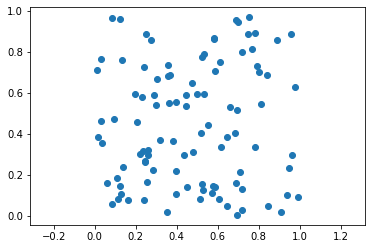

In [3]:
# make up some data for x 
D=2
x= torch.rand(100,D)
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

(0.060148739814758295,
 1.9257378339767457,
 0.04752920866012572,
 1.9129040360450744)

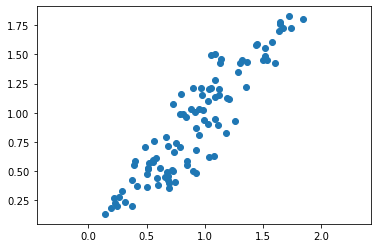

In [4]:
x[:,0] = x[:,0] + x[:,1] 
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

In [5]:
x[0]

tensor([0.6754, 0.4923])

In [6]:
def encoder(x,w,b):
    return x[:,0]*w[0]+x[:,1]*w[1]+b

In [7]:
def decoder(z,w,b):  
    x = torch.ones(100,2)
    x[:,0] = z*w[:,0] + b[:,0]
    x[:,1]= z*w[:,1] + b[:,1]          
    return x

In [8]:
from torch import nn
loss_func = torch.nn.MSELoss()

Text(0.5, 1.0, 'Loss vs epochs - SGD')

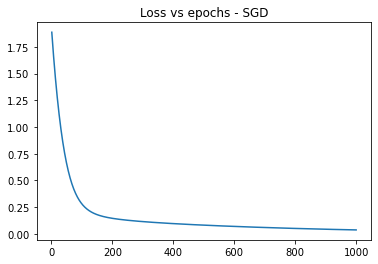

In [9]:
losses=[]
epochs=[]
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
opt=torch.optim.SGD([wEncoder,bEncoder,wDecoder,bDecoder], lr=0.01)
steps=1000
for i in range(steps):     
    opt.zero_grad()
    z=encoder(x,wEncoder,bEncoder)
    y=decoder(z,wDecoder,bDecoder)
    loss=loss_func(y,x)
    loss.backward()
    opt.step()  
    losses.append(loss.item())
    epochs.append(i+1)
#print(losses)
plt.plot(epochs,losses)
plt.title('Loss vs epochs - SGD')

Text(0.5, 1.0, 'SGD - Input data / constructed data / encoder weights')

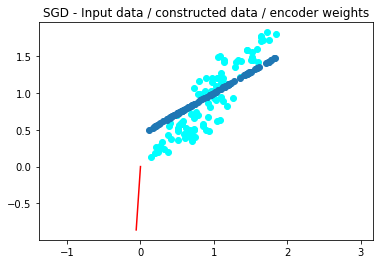

In [10]:
plt.scatter(x[:,0],x[:,1], color='cyan')
plt.scatter(y[:,0].detach().numpy(),y[:,1].detach().numpy())
plt.plot([0,wEncoder[0,0].detach().numpy()],[0,wEncoder[1,0].detach().numpy()],'-r')
plt.axis('equal')
plt.title('SGD - Input data / constructed data / encoder weights')

In [11]:
#ratio of weight in the encoder vs decoder for each dimensions
print(wEncoder[0,0].detach().numpy()/wDecoder[0,0].detach().numpy(),wEncoder[1,0].detach().numpy()/wDecoder[0,1].detach().numpy())


0.052501105 1.36625


Now, add momentum and do the same process as above

Text(0.5, 1.0, 'Loss vs epochs - SGD with momentum')

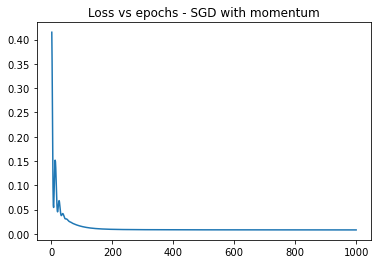

In [12]:
losses=[]
epochs=[]
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
opt=torch.optim.SGD([wEncoder,bEncoder,wDecoder,bDecoder], lr=0.01, momentum=0.9)
steps=1000
for i in range(steps):     
    opt.zero_grad()
    z=encoder(x,wEncoder,bEncoder)
    y=decoder(z,wDecoder,bDecoder)
    loss=loss_func(y,x)
    loss.backward()
    opt.step()  
    losses.append(loss.item())
    epochs.append(i+1)
#print(losses)
plt.plot(epochs,losses)
plt.title('Loss vs epochs - SGD with momentum')

Text(0.5, 1.0, 'SGD with momentum - Input data / constructed data / encoder weights')

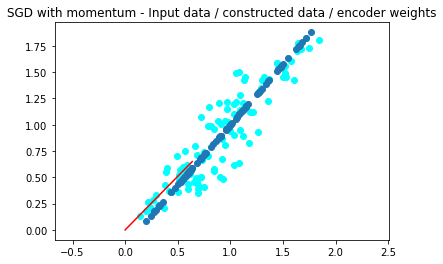

In [13]:
plt.scatter(x[:,0],x[:,1], color='cyan')
plt.scatter(y[:,0].detach().numpy(),y[:,1].detach().numpy())
plt.plot([0,wEncoder[0,0].detach().numpy()],[0,wEncoder[1,0].detach().numpy()],'-r')
plt.axis('equal')
plt.title('SGD with momentum - Input data / constructed data / encoder weights')

In [14]:
#ratio of weight in the encoder vs decoder for each dimensions
print(wEncoder[0,0].detach().numpy()/wDecoder[0,0].detach().numpy(),wEncoder[1,0].detach().numpy()/wDecoder[0,1].detach().numpy())


0.8811451 0.78346264


Now switch to RMSprop and do the same process as above

Text(0.5, 1.0, 'Loss vs epochs - RMSprop')

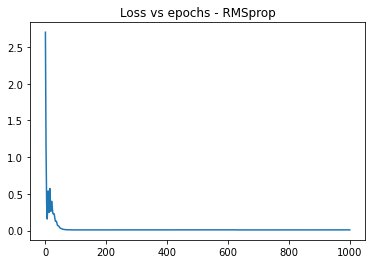

In [15]:
losses=[]
epochs=[]
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
opt=torch.optim.RMSprop([wEncoder,bEncoder,wDecoder,bDecoder], lr=0.01, momentum=0.9)
steps=1000
for i in range(steps):     
    opt.zero_grad()
    z=encoder(x,wEncoder,bEncoder)
    y=decoder(z,wDecoder,bDecoder)
    loss=loss_func(y,x)
    loss.backward()
    opt.step()  
    losses.append(loss.item())
    epochs.append(i+1)
#print(losses)
plt.plot(epochs,losses)
plt.title('Loss vs epochs - RMSprop')


Text(0.5, 1.0, 'RMSprop - Input data / constructed data / encoder weights')

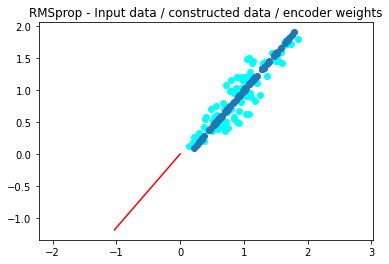

In [16]:
plt.scatter(x[:,0],x[:,1], color='cyan')
plt.scatter(y[:,0].detach().numpy(),y[:,1].detach().numpy())
plt.plot([0,wEncoder[0,0].detach().numpy()],[0,wEncoder[1,0].detach().numpy()],'-r')
plt.axis('equal')
plt.title('RMSprop - Input data / constructed data / encoder weights')

In [17]:
#ratio of weight in the encoder vs decoder for each dimensions
print(wEncoder[0,0].detach().numpy()/wDecoder[0,0].detach().numpy(),wEncoder[1,0].detach().numpy()/wDecoder[0,1].detach().numpy())


2.523778 2.5225258


I noticed couple of things after running the code above a few times:

1. The learned weight is different each time, this is due to the random start point
2. The Converging speed of the loss function depends on where it starts as well
3. The plot of loss function vs epochs using SGD is very smooth, while the other two is a bit bumpy.
4. It looks like the learning speed of SGD with momentum is faster than without momentum
5. The constructed data using RMSprop is almost perfectly linear with the input data which suggests it has the best performance


## AIML420 ONLY


1.In a text cell: explain the relationship between the above autoencoder and PCA.

The above autoencoder is a linear autoencoder. It encodes the data to a lower dimension then decode the data back to it's original dimension space, the way autoencoder works is not the same as PCA. PCA learns a linear transformation that projects the data to a differen space which are the components. We can then choose a smaller number of components to reduce the dimentionality. But autoencoder can be used to model complext non linear functions.

PCA is faster and computationally cheaper than autoencoders.

However, an one layer autoencoder with linear activation function is almost equivlant to PCA. In the above autoencoder, the activatio function is linear, so if we want to transfor X->z->x1, then we can write x1=w2*Z = w2* w1*x which is the same as how PCA transforms the data.


2. In a text cell: in the notebook with the Week 9 tutorial, you may have noticed how the RMSprop and Adam optimisers seem to prefer travelling along diagonal lines. Why does this happen?

RmsProp and Adam optimisers are adaptive Learning Algorithms while SGD with momentum uses constant learning rate.
Algorithms using constant learning rate is like letting a ball rolling down a hill. They take large steps when the direction is the same, but small steps if the direction changes.
RmsProp and Adam optimisers adapts their learning rate using a moving average of their gradient's square value. As this value increase, the learning rate becomes smaller allowing the algorithm to converge.This allows RMSProp and Adam to escape a saddle point much better. They will take a straight path whereas gradient descent takes the approach of “let the ball rolls down the steep slope first and worry about the slower direction later”
